In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

 
df = pd.read_csv('electricity.csv')

# 


In [2]:
df

,unique_id,ds,y,Exogenous1,Exogenous2
0,BE,10/22/2016 0:00,70.000000,49593.0,57253.0
1,BE,10/22/2016 1:00,37.100000,46073.0,51887.0
2,BE,10/22/2016 2:00,37.100000,44927.0,51896.0
3,BE,10/22/2016 3:00,44.750000,44483.0,48428.0
4,BE,10/22/2016 4:00,37.100000,44338.0,46721.0
...,...,...,...,...,...
8395,PJM,12/23/2018 19:00,32.461970,98288.0,11711.0
8396,PJM,12/23/2018 20:00,32.052179,97194.0,11637.0
8397,PJM,12/23/2018 21:00,27.632347,94319.0,11433.0
8398,PJM,12/23/2018 22:00,24.746053,90106.0,11108.0


In [20]:
# Filter the dataframe to include only rows where the 'unique_id' is "DE"
df = df[df['unique_id'] == "DE"]
df

,unique_id,ds,y,Exogenous1,Exogenous2
1680,DE,2017-10-22 00:00:00,19.10,587.25,16972.75
1681,DE,2017-10-22 01:00:00,19.03,623.00,16254.50
1682,DE,2017-10-22 02:00:00,16.90,650.00,15940.25
1683,DE,2017-10-22 03:00:00,12.98,687.25,15959.50
1684,DE,2017-10-22 04:00:00,9.24,717.25,16071.50
...,...,...,...,...,...
3355,DE,2017-12-30 19:00:00,16.18,1519.50,19326.00
3356,DE,2017-12-30 20:00:00,11.13,1526.75,18135.25
3357,DE,2017-12-30 21:00:00,4.62,1514.75,17631.50
3358,DE,2017-12-30 22:00:00,4.71,1484.75,17553.75


In [21]:
df['ds'] = pd.to_datetime(df['ds'])
data = df[['y', 'Exogenous1', 'Exogenous2']].values

scaler = MinMaxScaler()
data = scaler.fit_transform(data)

 
X = data[:, 1:]   
y = data[:, 0]   


In [22]:
X.shape

(1680, 2)

In [23]:
y.shape

(1680,)

In [24]:
 
def create_sequences(X, y, seq_length):
    sequences = []
    labels = []
    for i in range(len(X) - seq_length):
        sequences.append(X[i:i+seq_length])
        labels.append(y[i+seq_length])
    return torch.FloatTensor(sequences), torch.FloatTensor(labels)

seq_length = 3 # 3 saatlik geçmiş veriyle tahmin yapalım 
X_seq, y_seq = create_sequences(X, y, seq_length)


X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)


In [25]:
print(X_train[0])
y_train[0]

tensor([[0.2797, 0.2934],
        [0.2970, 0.2493],
        [0.3101, 0.2300]])


tensor(0.4631)

In [26]:
print(X_test[0])
y_test[0]

tensor([[0.2508, 0.5198],
        [0.2489, 0.4945],
        [0.2468, 0.4313]])


tensor(0.5399)

In [27]:
from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [28]:
for x,y in train_loader :
    print(x.shape)
    print(y.shape)

torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])
torch.Size([32, 3, 2])
torch.Size([32])


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        
        lstm_out, _ = self.lstm(x)
        last_hidden = lstm_out[:, -1, :]
        return self.fc(last_hidden)

input_size = 2  
hidden_size = 64  
output_size = 1  


model = LSTMModel(input_size, hidden_size, output_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


LSTMModel(
  (lstm): LSTM(2, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [34]:

loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()
train_losses = []
mse_values = []

epochs = 600
for epoch in range(epochs):
    epoch_loss = 0
    mse_epoch = 0
    for seq, labels in train_loader:
        seq, labels = seq.to(device), labels.to(device)

        optimizer.zero_grad()  
        y_pred = model(seq)  
        loss = loss_function(y_pred.squeeze(), labels)  
        mse = torch.mean((y_pred - labels) ** 2).item()
        mse_epoch += mse
        loss.backward()  
        optimizer.step()  
        epoch_loss += loss.item()
        avg_loss = epoch_loss / len(X_train)
        avg_mse = mse_epoch / len(X_train)
        train_losses.append(avg_loss)
        mse_values.append(avg_mse)


    if epoch % 10 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')


Epoch 0 Loss: 0.001072293845936656
Epoch 10 Loss: 0.0008260656613856554
Epoch 20 Loss: 0.0011018023360520601
Epoch 30 Loss: 0.002729017985984683
Epoch 40 Loss: 0.0012613561702892184
Epoch 50 Loss: 0.0012085555354133248
Epoch 60 Loss: 0.0010828716913238168
Epoch 70 Loss: 0.0009871887741610408
Epoch 80 Loss: 0.0011298106983304024
Epoch 90 Loss: 0.006951858289539814
Epoch 100 Loss: 0.002168843988329172
Epoch 110 Loss: 0.0009374896762892604
Epoch 120 Loss: 0.0017449704464524984
Epoch 130 Loss: 0.0003500503080431372
Epoch 140 Loss: 0.0005973627557978034
Epoch 150 Loss: 0.0011760455090552568
Epoch 160 Loss: 0.0008092409698292613
Epoch 170 Loss: 0.0008461173274554312
Epoch 180 Loss: 0.0013634199276566505
Epoch 190 Loss: 0.001078780391253531
Epoch 200 Loss: 0.0010440327459946275
Epoch 210 Loss: 0.0008326669922098517
Epoch 220 Loss: 0.0026944123674184084
Epoch 230 Loss: 0.0011375475442036986
Epoch 240 Loss: 0.0008262909832410514
Epoch 250 Loss: 0.0018403230933472514
Epoch 260 Loss: 0.0018299834

In [35]:
import matplotlib.pyplot as plt

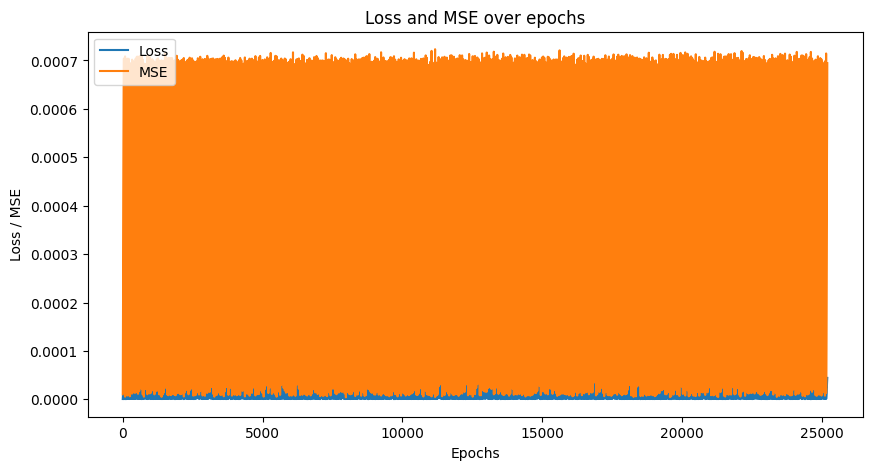

In [36]:
plt.figure(figsize=(10,5))
plt.plot(train_losses, label="Loss")
plt.plot(mse_values, label="MSE")
plt.title("Loss and MSE over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss / MSE")
plt.legend()
plt.show()

In [37]:

model.eval()
test_predictions = []
with torch.no_grad():
    for seq in X_test:
        seq = seq.to(device)
        y_pred = model(seq.unsqueeze(0))  
        test_predictions.append(y_pred.item())

test_predictions_np = np.array(test_predictions)


In [38]:

model.eval()
test_predictions = []
test_labels = []
mse_loss = 0.0

with torch.no_grad():
    for seq, labels in DataLoader(TensorDataset(X_test, y_test), batch_size=32):
        seq = seq.to(device)
        labels = labels.to(device)
        y_pred = model(seq) 
        test_predictions.append(y_pred.cpu().numpy())  
        test_labels.append(labels.cpu().numpy())  
        
# Numpy dizisine çevir
test_predictions_np = np.concatenate(test_predictions)
test_labels_np = np.concatenate(test_labels)


mse_loss = np.mean((test_predictions_np - test_labels_np) ** 2)
print(f'Test MSE: {mse_loss}')


Test MSE: 0.0324842594563961


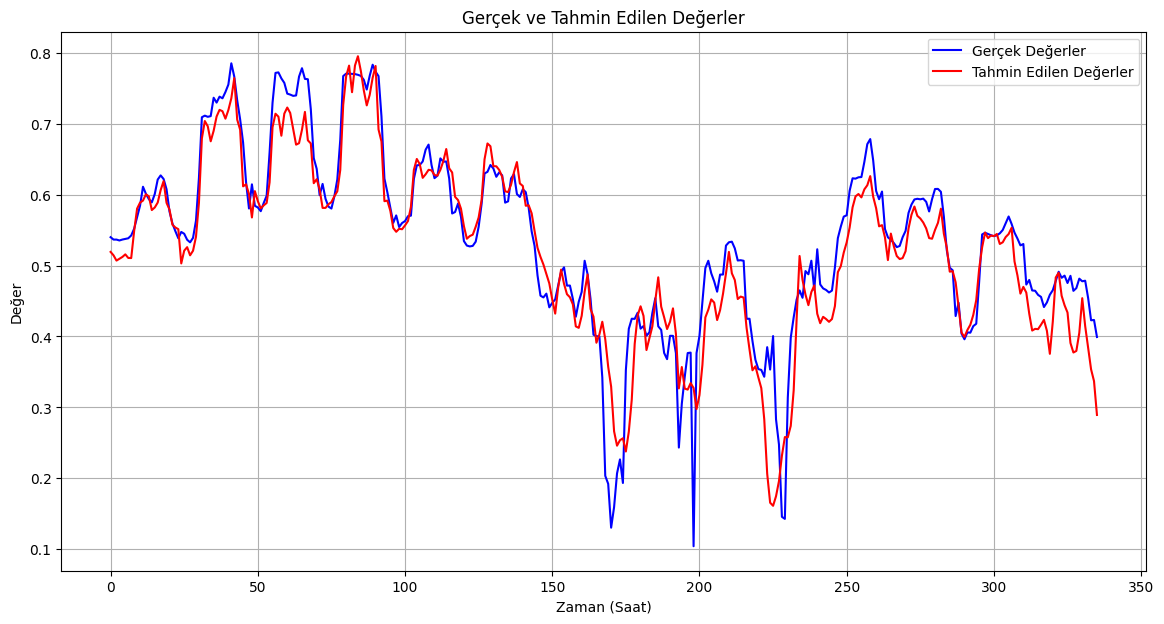

In [40]:

test_predictions_np = np.concatenate(test_predictions)  
test_labels_np = np.concatenate(test_labels)  


plt.figure(figsize=(14, 7))
plt.plot(test_labels_np, label='Gerçek Değerler', color='blue')
plt.plot(test_predictions_np, label='Tahmin Edilen Değerler', color='red')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Zaman (Saat)')
plt.ylabel('Değer')
plt.legend()
plt.grid()
plt.show()
